In [52]:
from ultralytics import YOLO
import tensorflow as tf
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

In [ ]:
model = YOLO("../models/rf_yolov8n_skrews_new/weights/best.pt")

In [21]:
model.task

'detect'

In [22]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [24]:
n_params = sum(p.numel() for p in model.model.parameters())
n_trainable = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
print("params:", n_params, "trainable:", n_trainable)

params: 3011823 trainable: 0


In [35]:
metrics = model.val(
    data="../datasets/EmbeddedAIProject-7/data.yaml",
    project="val_results",   # base directory
    name="rf_yolov8n_skrews_v", # subfolder
    plots=True,                   # or False if you want
    save=True                    # predictions (images) not saved by default in val
)
save_dir = Path(metrics.save_dir)
with open(save_dir / "summary.txt", "w") as f:
    f.write(str(metrics))

Ultralytics 8.4.6 🚀 Python-3.11.14 torch-2.9.1 CPU (Apple M3 Pro)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 244.1±38.8 MB/s, size: 43.9 KB)
val: Scanning /Users/helbuk/Library/Mobile Documents/com~apple~CloudDocs/NTNU/NTNU_Thesis_2026/Compiler-Aware_Model_Optimization/Thesis_Compiler_Aware_Model_Optimization_2026/thesis2026-project/datasets/EmbeddedAIProject-7/valid/labels.cache... 98 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 98/98 17.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 3.6s/it 25.2s4.7ss
                   all         98        363      0.927      0.951      0.964      0.733
         machine_screw         25        123      0.931      0.967      0.989      0.625
         miscellaneous         14         16      0.754      0.812      0.845      0.562
                   nut         16         41      0.9

In [32]:
metrics

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x11b092f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [33]:
metrics.results_dict

{'metrics/precision(B)': 0.9266823366389026,
 'metrics/recall(B)': 0.9513077975776044,
 'metrics/mAP50(B)': 0.9635036737957374,
 'metrics/mAP50-95(B)': 0.7325697234808777,
 'fitness': 0.7325697234808777}

In [36]:
import torch.nn as nn

nn.GELU()                    # default (approx)
nn.GELU(approximate='tanh')  # explicit

GELU(approximate='tanh')

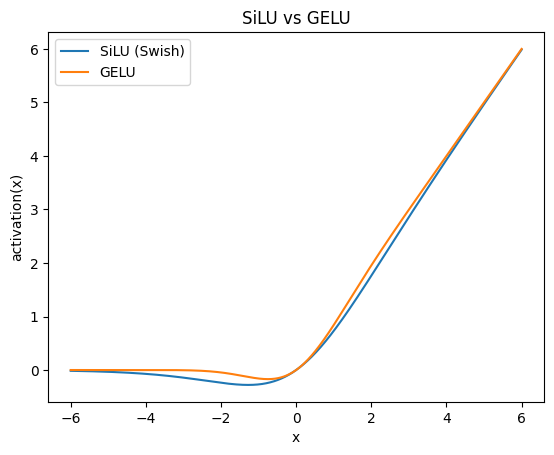

In [53]:
%matplotlib inline
x = np.linspace(-6, 6, 1000)
# silu = x / (1 + np.exp(-x))
# gelu = 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

silu = tf.nn.silu(x)
gelu = tf.nn.gelu(x, approximate=True)


plt.figure()
plt.plot(x, silu, label="SiLU (Swish)")
plt.plot(x, gelu, label="GELU")
plt.xlabel("x")
plt.ylabel("activation(x)")
plt.legend()
plt.title("SiLU vs GELU")
plt.show()